In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Reading the Data Set
dataset = pd.read_csv('ITC.csv')
dataset.head()

C:\Users\satya\AppData\Local\Temp\ipykernel_18844\670553834.py:2: DtypeWarning: Columns (0,1,2,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('ITC.csv')


,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,ITC,EQ,16-Nov-05,128.30,128.3,131.40,128.30,130.75,130.55,130.21,7674878.0,9.993235e+08,-,3723434.0,48.51
1,ITC,EQ,17-Nov-05,130.55,130.8,131.45,129.15,130.30,130.20,129.97,5615090.0,7.298068e+08,-,2703422.0,48.15
2,ITC,EQ,18-Nov-05,130.20,130.6,131.50,130.05,130.50,130.80,130.91,4292668.0,5.619565e+08,-,1851014.0,43.12
3,ITC,EQ,21-Nov-05,130.80,131.0,131.00,126.15,126.50,126.75,128.20,9279903.0,1.189681e+09,-,5758233.0,62.05
4,ITC,EQ,22-Nov-05,126.75,128.4,129.80,124.75,125.05,125.10,125.92,8280229.0,1.042652e+09,-,3199799.0,38.64


# Analyzing the Data

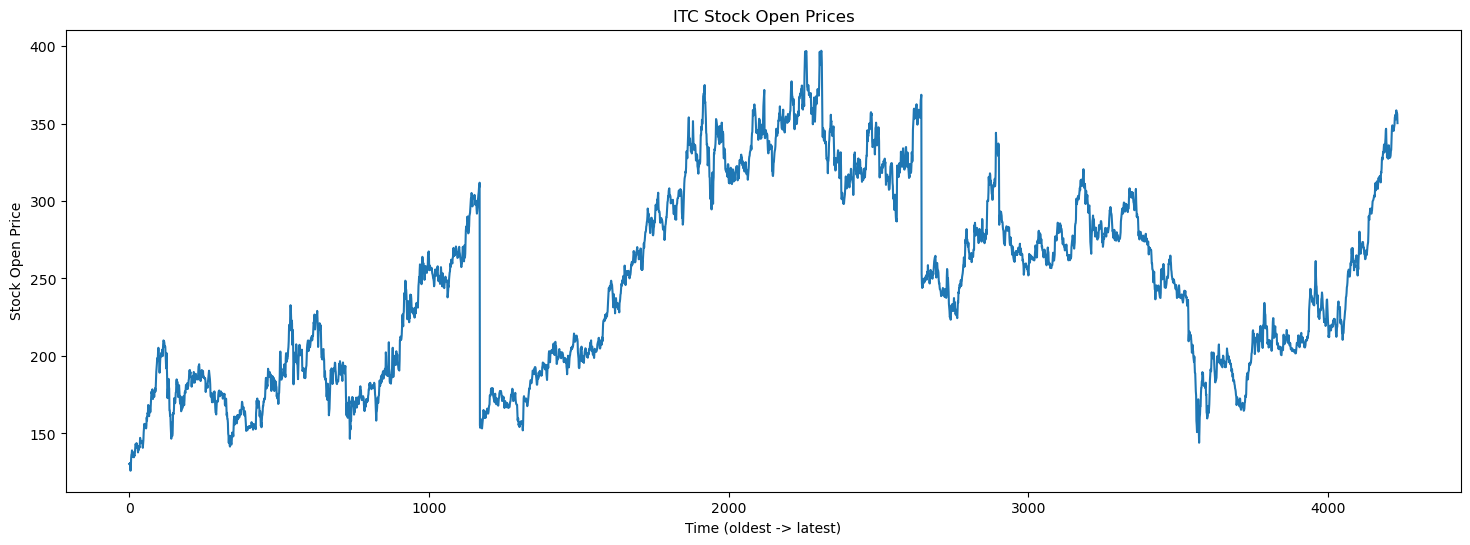

In [3]:
#Representing Price on Graph
plt.figure(figsize=(18, 6))
plt.plot(dataset['Average Price'])
plt.title("ITC Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()

In [4]:
#Analysing the Data types in the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048573 entries, 0 to 1048572
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  4233 non-null   object 
 1   Series                  4233 non-null   object 
 2   Date                    4233 non-null   object 
 3   Prev Close              4233 non-null   float64
 4   Open Price              4233 non-null   float64
 5   High Price              4233 non-null   float64
 6   Low Price               4233 non-null   float64
 7   Last Price              4233 non-null   float64
 8   Close Price             4233 non-null   float64
 9   Average Price           4233 non-null   float64
 10  Total Traded Quantity   4233 non-null   float64
 11  Turnover                4233 non-null   float64
 12  No. of Trades           4234 non-null   object 
 13  Deliverable Qty         4233 non-null   float64
 14  % Dly Qt to Traded Qty  4233 non-n

# Converting the object values into numbers and removing the Extra Column 

In [5]:
# Replacing the Missing Values of number of trades with Column Avg.
dataset['No. of Trades']=dataset['No. of Trades'].str.replace("-","100967")
dataset['No. of Trades']=dataset['No. of Trades'].astype(float)

In [6]:
# Replacing deliverable % on missing values with 100 as in bulk Order delivery percent is 100.
dataset['% Dly Qt to Traded Qty']=dataset['% Dly Qt to Traded Qty'].str.replace("-","100")
dataset['% Dly Qt to Traded Qty']=dataset['% Dly Qt to Traded Qty'].astype(float)

In [7]:
# Converting Dates into numeric format.
dataset['Date']=dataset['Date'].str.replace("Jan","01")
dataset['Date']=dataset['Date'].str.replace("Feb","02")
dataset['Date']=dataset['Date'].str.replace("Mar","03")
dataset['Date']=dataset['Date'].str.replace("Apr","04")
dataset['Date']=dataset['Date'].str.replace("May","05")
dataset['Date']=dataset['Date'].str.replace("Jun","06")
dataset['Date']=dataset['Date'].str.replace("Jul","07")
dataset['Date']=dataset['Date'].str.replace("Aug","08")
dataset['Date']=dataset['Date'].str.replace("Sep","09")
dataset['Date']=dataset['Date'].str.replace("Oct","10")
dataset['Date']=dataset['Date'].str.replace("Nov","11")
dataset['Date']=dataset['Date'].str.replace("Dec","12")

In [8]:
# Removing symbol column as it contains single category data.
dataset=dataset.drop(['Symbol'],axis=1)

In [9]:
# Turning the categorical data into numbers(Series)
dataset['Series']=dataset['Series'].str.replace("EQ","0")
dataset['Series']=dataset['Series'].str.replace("BL","1")
dataset['Series']=dataset['Series'].astype(float)

In [10]:
# Adding a Return column
dataset['%Return']=(dataset['Close Price']-dataset['Prev Close'])/dataset['Prev Close']*100

In [11]:
dataset.head()

,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,%Return
0,0.0,16-11-05,128.30,128.3,131.40,128.30,130.75,130.55,130.21,7674878.0,9.993235e+08,100967.0,3723434.0,48.51,1.753702
1,0.0,17-11-05,130.55,130.8,131.45,129.15,130.30,130.20,129.97,5615090.0,7.298068e+08,100967.0,2703422.0,48.15,-0.268097
2,0.0,18-11-05,130.20,130.6,131.50,130.05,130.50,130.80,130.91,4292668.0,5.619565e+08,100967.0,1851014.0,43.12,0.460829
3,0.0,21-11-05,130.80,131.0,131.00,126.15,126.50,126.75,128.20,9279903.0,1.189681e+09,100967.0,5758233.0,62.05,-3.096330
4,0.0,22-11-05,126.75,128.4,129.80,124.75,125.05,125.10,125.92,8280229.0,1.042652e+09,100967.0,3199799.0,38.64,-1.301775


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048573 entries, 0 to 1048572
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Series                  4233 non-null   float64
 1   Date                    4233 non-null   object 
 2   Prev Close              4233 non-null   float64
 3   Open Price              4233 non-null   float64
 4   High Price              4233 non-null   float64
 5   Low Price               4233 non-null   float64
 6   Last Price              4233 non-null   float64
 7   Close Price             4233 non-null   float64
 8   Average Price           4233 non-null   float64
 9   Total Traded Quantity   4233 non-null   float64
 10  Turnover                4233 non-null   float64
 11  No. of Trades           4233 non-null   float64
 12  Deliverable Qty         4233 non-null   float64
 13  % Dly Qt to Traded Qty  4233 non-null   float64
 14  %Return                 4233 non-n

In [38]:
# Exporting Processed Data
dataset.to_csv("processed_dataset.csv", index = False)

 # Data Visualisation

C:\Users\satya\AppData\Local\Temp\ipykernel_18844\2081820229.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['%Return'],bins=55)


Text(0.5, 0, 'Return %')

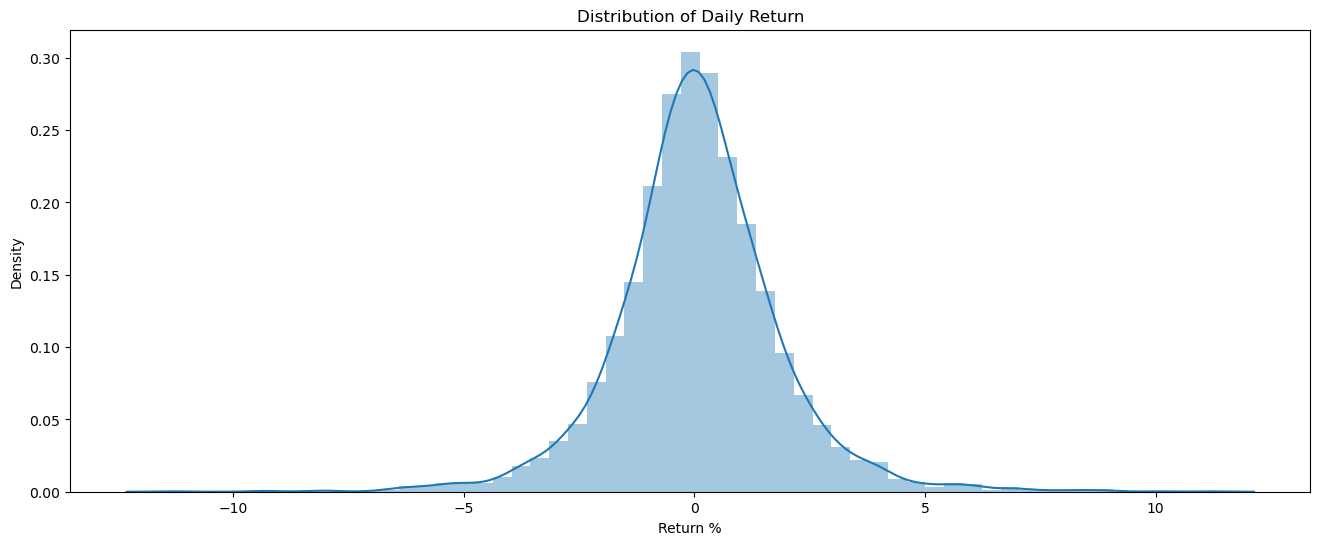

In [29]:
#Distibution Plot of Daily Return %
dataset['%Return'] = np.where(dataset['%Return'] < -12,
                                           -1,
                                           dataset['%Return'])
dataset['%Return'] = np.where(dataset['%Return'] > 12,
                                           1,
                                           dataset['%Return'])
plt.figure(figsize=(16, 6))
sns.distplot(dataset['%Return'],bins=55)
plt.title("Distribution of Daily Return")
plt.xlabel("Return %")

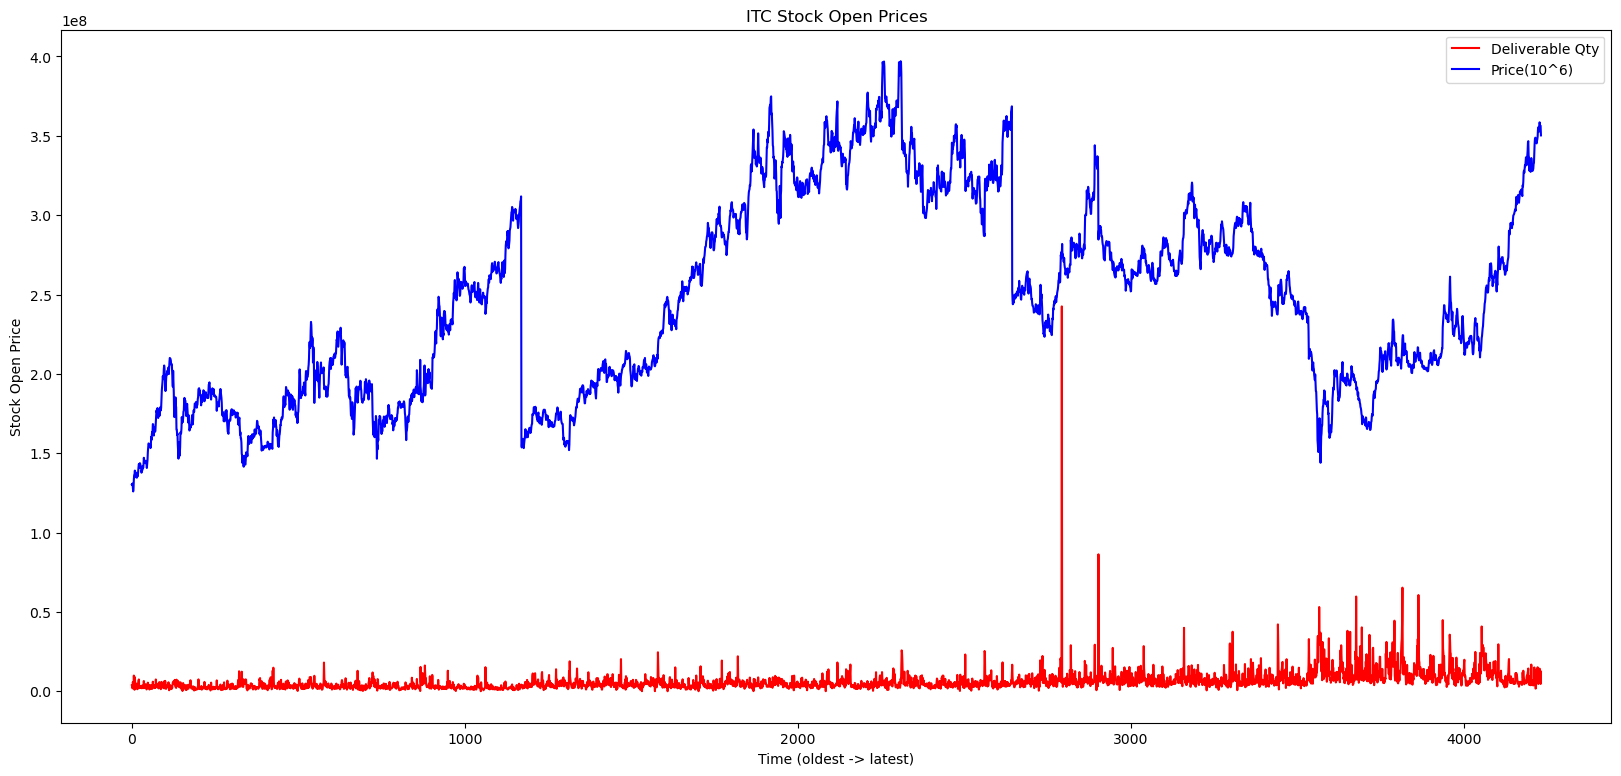

In [22]:
#Representing Price on Graph
plt.figure(figsize=(20, 9))
plt.plot(dataset['Deliverable Qty'], color = 'red', label = 'Deliverable Qty')
plt.plot(dataset['Average Price']*1000000, color = 'blue', label = 'Price(10^6)')
plt.title("ITC Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.legend()
plt.show()

Text(0, 0.5, 'Deliverable Qty * 10^6')

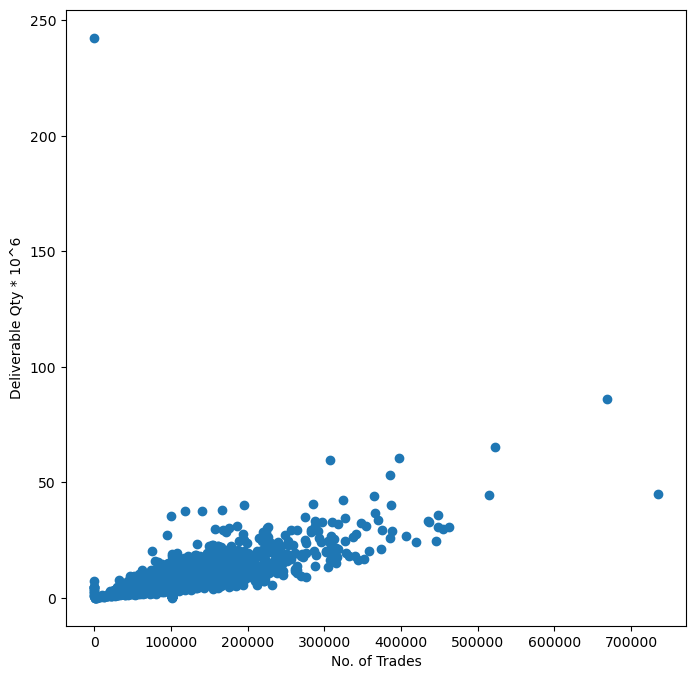

In [34]:
# Distribution of Number of Trades to the Deliverable Qty
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(dataset['No. of Trades'],dataset['Deliverable Qty']/1000000)
plt.xlabel("No. of Trades")
plt.ylabel("Deliverable Qty * 10^6")